Our ml model will predict

Note: Code is from class hands-ons and chatGPT 3.5

In [4]:
import numpy as np #import libraries
import pandas as pd
from inspect import BoundArguments
from pandas.core.api import DataFrame
import pickle
import numpy


df = pd.read_csv("NYPD_Shooting_Incident_Data.csv") #read csv with pandas and print first 5 rows
df.head()


,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,Borough Boundaries,City Council Districts,Police Precincts,Zip Codes,Community Districts
0,228798151,05/27/2021,21:30:00,QUEENS,NaN,105,0.0,NaN,NaN,False,...,1.058925e+06,180924.000000,40.662965,-73.730839,POINT (-73.73083868899994 40.662964620000025),3.0,47.0,63.0,24018.0,63.0
1,137471050,06/27/2014,17:40:00,BRONX,NaN,40,0.0,NaN,NaN,False,...,1.005028e+06,234516.000000,40.810352,-73.924942,POINT (-73.92494232599995 40.81035186300006),5.0,35.0,23.0,10932.0,49.0
2,147998800,11/21/2015,03:56:00,QUEENS,NaN,108,0.0,NaN,NaN,True,...,1.007668e+06,209836.531250,40.742607,-73.915492,POINT (-73.91549174199997 40.74260663300004),3.0,33.0,66.0,14787.0,53.0
3,146837977,10/09/2015,18:30:00,BRONX,NaN,44,0.0,NaN,NaN,False,...,1.006537e+06,244511.140625,40.837782,-73.919457,POINT (-73.91945661499994 40.83778200300003),5.0,42.0,27.0,10930.0,50.0
4,58921844,02/19/2009,22:58:00,BRONX,NaN,47,0.0,NaN,NaN,True,...,1.024922e+06,262189.406250,40.886238,-73.852910,POINT (-73.85290950899997 40.88623791800006),5.0,2.0,30.0,11275.0,29.0


In [5]:
from matplotlib import pyplot as plt


Text(0.5, 1.0, 'Shooting Incident Victims By Age Group')

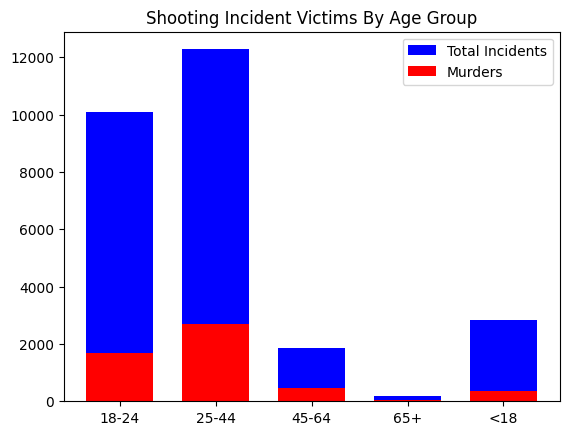

In [6]:
selected_age_groups = ["<18", "18-24", "25-44", "45-64", "65+"]

filtered_df = df[df['VIC_AGE_GROUP'].isin(selected_age_groups)]

incident_by_vic_age = filtered_df.groupby('VIC_AGE_GROUP').size() # from chatGPT
murders_by_vic_age = filtered_df[filtered_df['STATISTICAL_MURDER_FLAG']]['VIC_AGE_GROUP'].value_counts().sort_index()


plt.bar(incident_by_vic_age.index, incident_by_vic_age, color = 'blue', width = .7, label='Total Incidents')
plt.bar(murders_by_vic_age.index, murders_by_vic_age, color = 'red', width = .7, label='Murders')
plt.legend()
plt.title ('Shooting Incident Victims By Age Group')


Text(0.5, 1.0, 'Shooting Incident Perpetrator By Age Group')

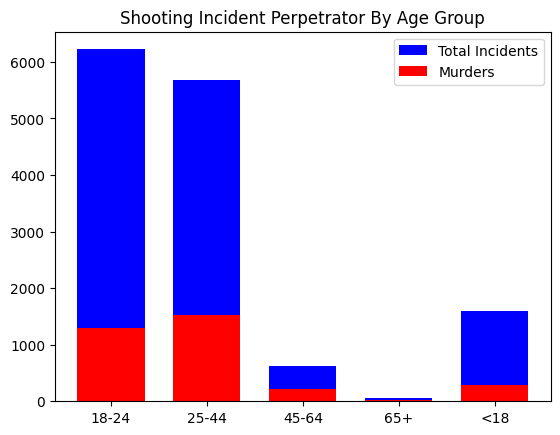

In [7]:
selected_age_groups = ["<18", "18-24", "25-44", "45-64", "65+"]

filtered_df = df[df['PERP_AGE_GROUP'].isin(selected_age_groups)]

incident_by_perp_age = filtered_df.groupby('PERP_AGE_GROUP').size() # from chatGPT
murders_by_perp_age = filtered_df[filtered_df['STATISTICAL_MURDER_FLAG']]['PERP_AGE_GROUP'].value_counts().sort_index()


plt.bar(incident_by_perp_age.index, incident_by_perp_age, color = 'blue', width = .7, label='Total Incidents')
plt.bar(murders_by_perp_age.index, murders_by_perp_age, color = 'red', width = .7, label='Murders')
plt.legend()
plt.title ('Shooting Incident Perpetrator By Age Group')

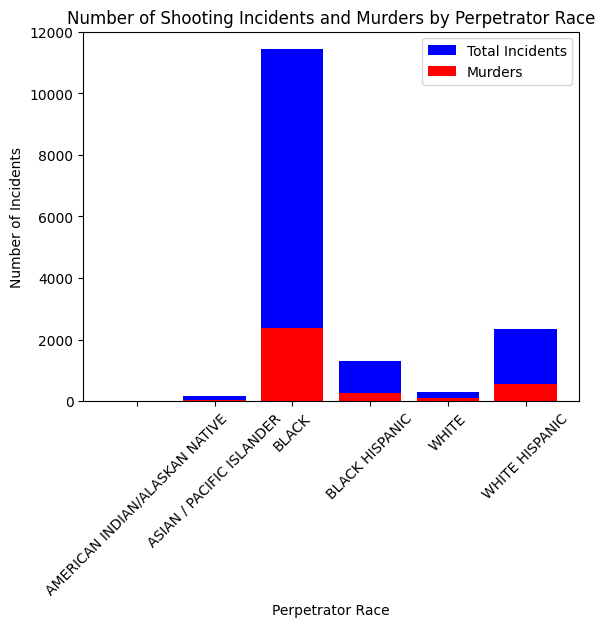

In [8]:
import matplotlib.pyplot as plt

selected_race = ["AMERICAN INDIAN/ALASKAN NATIVE", "ASIAN / PACIFIC ISLANDER", "BLACK", "WHITE", "BLACK HISPANIC", "WHITE HISPANIC"]

filtered_df = df[df['PERP_RACE'].isin(selected_race)]

incident_count_by_race = filtered_df.groupby('PERP_RACE').size()

plt.bar(incident_count_by_race.index, incident_count_by_race.values, color='blue', label='Total Incidents')


murders_by_race = filtered_df[filtered_df['STATISTICAL_MURDER_FLAG']]['PERP_RACE'].value_counts().sort_index()

plt.bar(murders_by_race.index, murders_by_race.values, color='red', label='Murders')

plt.xlabel("Perpetrator Race")
plt.ylabel("Number of Incidents")
plt.title("Number of Shooting Incidents and Murders by Perpetrator Race")

plt.xticks(rotation=45, fontsize=10)

plt.legend()

plt.show()


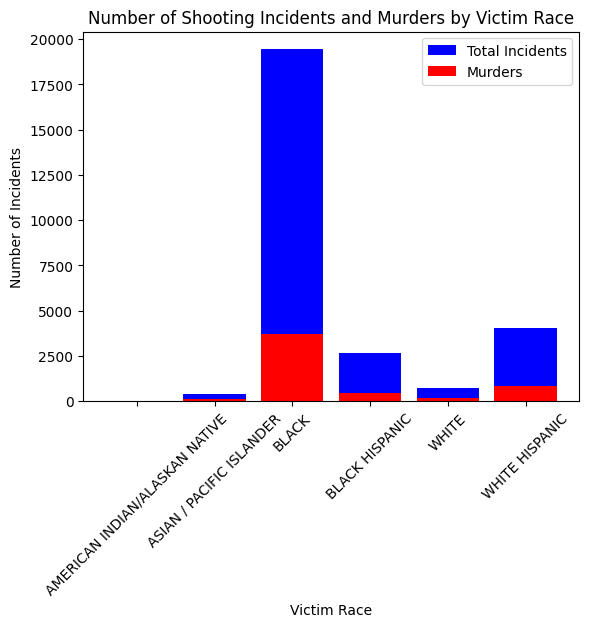

In [9]:
import matplotlib.pyplot as plt

selected_race = ["AMERICAN INDIAN/ALASKAN NATIVE", "ASIAN / PACIFIC ISLANDER", "BLACK", "WHITE", "BLACK HISPANIC", "WHITE HISPANIC"]

filtered_df = df[df['VIC_RACE'].isin(selected_race)]

incident_count_by_race = filtered_df.groupby('VIC_RACE').size()

plt.bar(incident_count_by_race.index, incident_count_by_race.values, color='blue', label='Total Incidents')


murders_by_race = filtered_df[filtered_df['STATISTICAL_MURDER_FLAG']]['VIC_RACE'].value_counts().sort_index()

plt.bar(murders_by_race.index, murders_by_race.values, color='red', label='Murders')

plt.xlabel("Victim Race")
plt.ylabel("Number of Incidents")
plt.title("Number of Shooting Incidents and Murders by Victim Race")

plt.xticks(rotation=45, fontsize=10)

plt.legend()

plt.show()


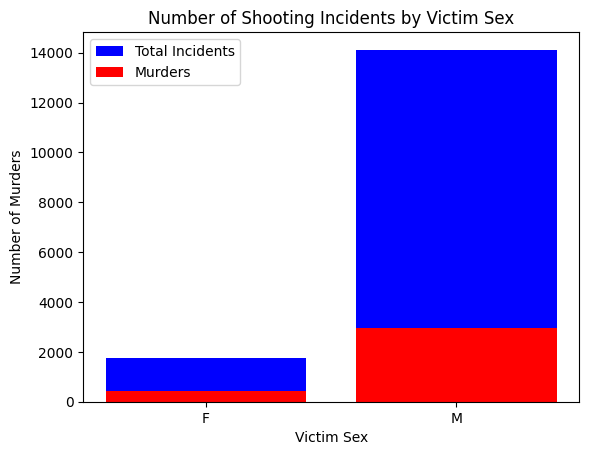

In [10]:
selected_sex = ["M", "F"]

filtered_df = df[df['VIC_SEX'].isin(selected_sex) & df['PERP_SEX'].isin(selected_sex)]

incident_count_by_vic_sex = filtered_df.groupby('VIC_SEX').size() # from chatGPT

plt.bar(incident_count_by_vic_sex.index, incident_count_by_vic_sex.values, color = 'blue', label='Total Incidents')

murders_by_vic_sex = filtered_df[filtered_df['STATISTICAL_MURDER_FLAG']]['VIC_SEX'].value_counts().sort_index()

plt.bar(murders_by_vic_sex.index, murders_by_vic_sex.values, color='red', label='Murders')


plt.legend()
plt.xlabel("Victim Sex")
plt.ylabel("Number of Murders")
plt.title("Number of Shooting Incidents by Victim Sex")

# Adjust the font size and rotation of x-axis labels

plt.show()


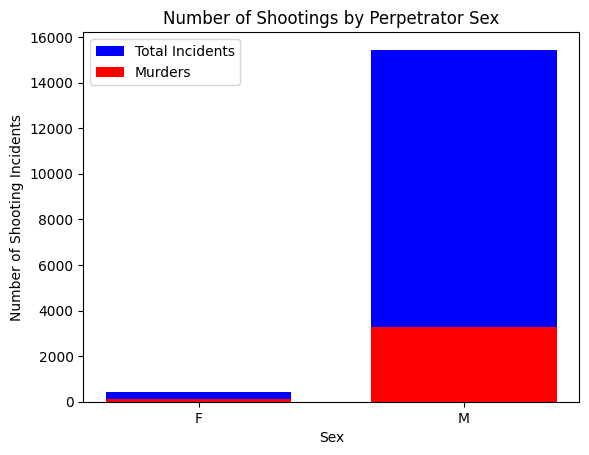

In [11]:
selected_sex = ["M", "F"]

filtered_df = df[df['PERP_SEX'].isin(selected_sex)]

incident_count_by_perp_sex = filtered_df.groupby('PERP_SEX').size() # from chatGPT
murders_by_perp_sex = filtered_df[filtered_df['STATISTICAL_MURDER_FLAG']]['PERP_SEX'].value_counts().sort_index()

plt.bar(incident_count_by_perp_sex.index, incident_count_by_perp_sex ,color ='blue', width = 0.7, label='Total Incidents')
plt.bar(murders_by_perp_sex.index, murders_by_perp_sex ,color ='red', width = 0.7, label='Murders')

plt.legend()


plt.xlabel("Sex")
plt.ylabel("Number of Shooting Incidents")
plt.title("Number of Shootings by Perpetrator Sex")
plt.show()

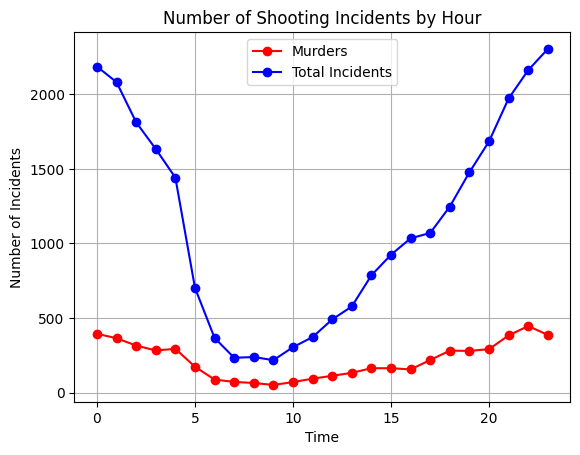

In [12]:


time = pd.to_datetime(df["OCCUR_TIME"]) #create histogram of occurance time with 24 bins (using matplotlib)
df['Hour'] = time.dt.hour

murders_by_hour = df[df['STATISTICAL_MURDER_FLAG']]['Hour'].value_counts().sort_index() #from chatGPT

murders_by_hour.plot(kind = 'line', marker = 'o', color = 'red', label='Murders')

#hour.hist(bins = 24) #24 bins to equate to military time

incident_count_by_year = df.groupby('Hour').size()


incident_count_by_year.plot(kind='line', marker='o', color='blue', label='Total Incidents')


plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of Incidents')
plt.title('Number of Shooting Incidents by Hour')
plt.grid(True)



Text(0.5, 1.0, 'Number of Shootings by Month')

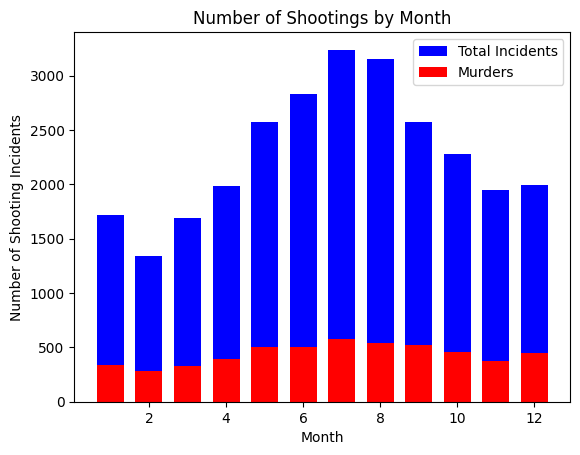

In [13]:
date = pd.to_datetime(df["OCCUR_DATE"])
df['Month'] = date.dt.month


incident_count_by_month = df.groupby('Month').size() # from chatGPT
plt.bar(incident_count_by_month.index, incident_count_by_month ,color ='blue', width = 0.7, label='Total Incidents')


murders_by_month = df[df['STATISTICAL_MURDER_FLAG']]['Month'].value_counts().sort_index() #from chatGPT
plt.bar(murders_by_month.index, murders_by_month ,color ='red', width = 0.7, label='Murders')


plt.legend()
plt.xlabel("Month")
plt.ylabel("Number of Shooting Incidents")

plt.title("Number of Shootings by Month")

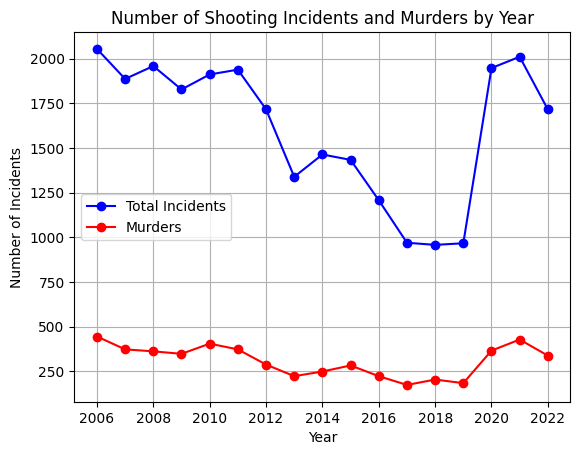

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

df['Year'] = date.dt.year

incident_count_by_year = df.groupby('Year').size()

incident_count_by_year.plot(kind='line', marker='o', color='blue', label='Total Incidents')

murders_by_year = df[df['STATISTICAL_MURDER_FLAG']]['Year'].value_counts().sort_index()

murders_by_year.plot(kind='line', marker='o', color='red', label='Murders')

plt.legend()
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.title("Number of Shooting Incidents and Murders by Year")
plt.grid(True)
plt.show()


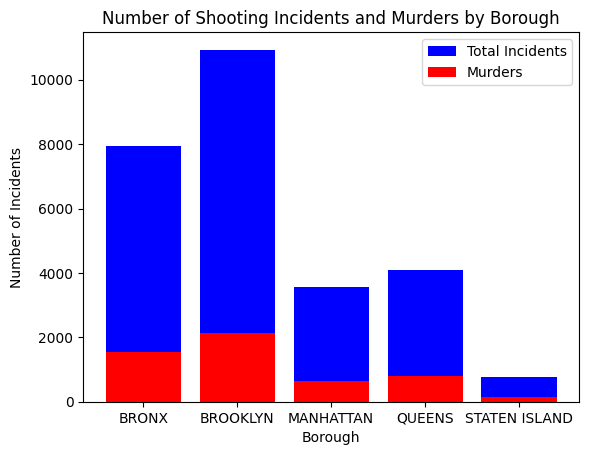

In [15]:
import matplotlib.pyplot as plt

incident_by_boro = df.groupby('BORO').size()

plt.bar(incident_by_boro.index, incident_by_boro.values, color='blue', label='Total Incidents')

murders_by_boro = df[df['STATISTICAL_MURDER_FLAG']]['BORO'].value_counts().sort_index()

plt.bar(murders_by_boro.index, murders_by_boro.values, color='red', label='Murders')

plt.xlabel("Borough")
plt.ylabel("Number of Incidents")
plt.title("Number of Shooting Incidents and Murders by Borough")

plt.legend()

plt.show()


In [16]:

cleaning_features = df[[ "STATISTICAL_MURDER_FLAG", "BORO",
                     'PERP_SEX', 'PERP_AGE_GROUP',  'PERP_RACE',
                     "VIC_AGE_GROUP",  "VIC_SEX", "VIC_RACE", 'Hour', 'Month', 'Year']]



Where we learned about the map command: https://realpython.com/python-map-function/

In [17]:
valid_categories = [0, 1]

def transform_flag (murder_column): #transform sex column to make binary
  murder_column = murder_column.map({False: 0, True: 1}) #from chatGPT
  return murder_column #from chatGPT

murder_flag = cleaning_features['STATISTICAL_MURDER_FLAG']

cleaning_features['STATISTICAL_MURDER_FLAG'] = transform_flag(murder_flag)

cleaning_features = cleaning_features[cleaning_features['STATISTICAL_MURDER_FLAG'].isin(valid_categories)]

cleaning_features

<ipython-input-17-237a1c80160b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaning_features['STATISTICAL_MURDER_FLAG'] = transform_flag(murder_flag)


,STATISTICAL_MURDER_FLAG,BORO,PERP_SEX,PERP_AGE_GROUP,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Hour,Month,Year
0,0,QUEENS,NaN,NaN,NaN,18-24,M,BLACK,21,5,2021
1,0,BRONX,NaN,NaN,NaN,18-24,M,BLACK,17,6,2014
2,1,QUEENS,NaN,NaN,NaN,25-44,M,WHITE,3,11,2015
3,0,BRONX,NaN,NaN,NaN,<18,M,WHITE HISPANIC,18,10,2015
4,1,BRONX,M,25-44,BLACK,45-64,M,BLACK,22,2,2009
...,...,...,...,...,...,...,...,...,...,...,...
27307,0,BRONX,(null),(null),(null),18-24,M,BLACK,3,5,2022
27308,0,MANHATTAN,F,25-44,WHITE HISPANIC,25-44,M,WHITE HISPANIC,13,1,2022
27309,0,MANHATTAN,M,18-24,BLACK,25-44,M,BLACK,3,6,2022
27310,0,BRONX,M,25-44,BLACK,25-44,M,WHITE HISPANIC,20,6,2022


In [18]:
valid_categories = [0, 1]

def transform_sex (sex_column): #transform sex column to make binary
  sex_column = sex_column.map({'M': 0, 'F': 1}) #from chatGPT
  return sex_column #from chatGPT

vic_sex = cleaning_features['VIC_SEX']
perp_sex = cleaning_features['PERP_SEX']

cleaning_features['VIC_SEX'] = transform_sex(vic_sex)
cleaning_features['PERP_SEX'] = transform_sex(perp_sex)

cleaning_features = cleaning_features[cleaning_features['VIC_SEX'].isin(valid_categories)]
cleaning_features = cleaning_features[cleaning_features['PERP_SEX'].isin(valid_categories)]

cleaning_features

,STATISTICAL_MURDER_FLAG,BORO,PERP_SEX,PERP_AGE_GROUP,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Hour,Month,Year
4,1,BRONX,0.0,25-44,BLACK,45-64,0.0,BLACK,22,2,2009
9,0,QUEENS,0.0,25-44,BLACK,25-44,0.0,BLACK,1,8,2012
11,0,BROOKLYN,0.0,25-44,BLACK,25-44,0.0,BLACK,1,8,2010
15,0,BRONX,0.0,UNKNOWN,UNKNOWN,18-24,0.0,BLACK,1,7,2007
16,1,MANHATTAN,0.0,25-44,BLACK,25-44,0.0,BLACK,2,7,2010
...,...,...,...,...,...,...,...,...,...,...,...
27306,1,BRONX,0.0,18-24,BLACK,<18,1.0,WHITE HISPANIC,16,5,2022
27308,0,MANHATTAN,1.0,25-44,WHITE HISPANIC,25-44,0.0,WHITE HISPANIC,13,1,2022
27309,0,MANHATTAN,0.0,18-24,BLACK,25-44,0.0,BLACK,3,6,2022
27310,0,BRONX,0.0,25-44,BLACK,25-44,0.0,WHITE HISPANIC,20,6,2022


In [19]:
valid_categories = [0, 1, 2, 3, 4]

def transform_age(age_column):
  return age_column.map({ #from chatGPT
        "<18": 0, #from chatGPT
        "18-24": 1, #from chatGPT
        "25-44": 2, #from chatGPT
        "45-64": 3, #from chatGPT
        "65+": 4 #from chatGPT
    }) #from chatGPT

vic_age = cleaning_features['VIC_AGE_GROUP']
perp_age = cleaning_features['PERP_AGE_GROUP']

cleaning_features['VIC_AGE_GROUP'] = transform_age(vic_age)
cleaning_features['PERP_AGE_GROUP'] = transform_age(perp_age)

cleaning_features = cleaning_features[cleaning_features['VIC_AGE_GROUP'].isin(valid_categories)]
cleaning_features = cleaning_features[cleaning_features['PERP_AGE_GROUP'].isin(valid_categories)]

cleaning_features

,STATISTICAL_MURDER_FLAG,BORO,PERP_SEX,PERP_AGE_GROUP,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Hour,Month,Year
4,1,BRONX,0.0,2.0,BLACK,3.0,0.0,BLACK,22,2,2009
9,0,QUEENS,0.0,2.0,BLACK,2.0,0.0,BLACK,1,8,2012
11,0,BROOKLYN,0.0,2.0,BLACK,2.0,0.0,BLACK,1,8,2010
16,1,MANHATTAN,0.0,2.0,BLACK,2.0,0.0,BLACK,2,7,2010
19,0,BROOKLYN,0.0,2.0,BLACK,2.0,0.0,WHITE,21,3,2021
...,...,...,...,...,...,...,...,...,...,...,...
27306,1,BRONX,0.0,1.0,BLACK,0.0,1.0,WHITE HISPANIC,16,5,2022
27308,0,MANHATTAN,1.0,2.0,WHITE HISPANIC,2.0,0.0,WHITE HISPANIC,13,1,2022
27309,0,MANHATTAN,0.0,1.0,BLACK,2.0,0.0,BLACK,3,6,2022
27310,0,BRONX,0.0,2.0,BLACK,2.0,0.0,WHITE HISPANIC,20,6,2022


In [20]:
valid_categories = [0, 1, 2, 3, 4, 5]

def transform_race(race_column):
  race_mapping = { #from chatGPT
        'WHITE': 0, #from chatGPT
        'BLACK': 1, #from chatGPT
        'WHITE HISPANIC': 2, #from chatGPT
        'BLACK HISPANIC': 3, #from chatGPT
        'ASIAN / PACIFIC ISLANDER': 4, #from chatGPT
        'AMERICAN INDIAN/ALASKAN NATIVE': 5 #from chatGPT
    } #from chatGPT
  return race_column.map(race_mapping) #from chatGPT , previously had commented statements below and chatGPT, provided the 2 rows above as a solution to our error



vic_race = cleaning_features['VIC_RACE']
perp_race = cleaning_features['PERP_RACE']

cleaning_features['VIC_RACE'] = transform_race(vic_race)
cleaning_features['PERP_RACE'] = transform_race(perp_race)

cleaning_features = cleaning_features[cleaning_features['VIC_RACE'].isin(valid_categories)]
cleaning_features = cleaning_features[cleaning_features['PERP_RACE'].isin(valid_categories)]

cleaning_features


,STATISTICAL_MURDER_FLAG,BORO,PERP_SEX,PERP_AGE_GROUP,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Hour,Month,Year
4,1,BRONX,0.0,2.0,1.0,3.0,0.0,1.0,22,2,2009
9,0,QUEENS,0.0,2.0,1.0,2.0,0.0,1.0,1,8,2012
11,0,BROOKLYN,0.0,2.0,1.0,2.0,0.0,1.0,1,8,2010
16,1,MANHATTAN,0.0,2.0,1.0,2.0,0.0,1.0,2,7,2010
19,0,BROOKLYN,0.0,2.0,1.0,2.0,0.0,0.0,21,3,2021
...,...,...,...,...,...,...,...,...,...,...,...
27306,1,BRONX,0.0,1.0,1.0,0.0,1.0,2.0,16,5,2022
27308,0,MANHATTAN,1.0,2.0,2.0,2.0,0.0,2.0,13,1,2022
27309,0,MANHATTAN,0.0,1.0,1.0,2.0,0.0,1.0,3,6,2022
27310,0,BRONX,0.0,2.0,1.0,2.0,0.0,2.0,20,6,2022


In [21]:
valid_categories = [0, 1, 2, 3, 4, 5]

def transform_borough(borough):
  borough_mapping = { #from chatGPT
        'QUEENS': 0, #from chatGPT
        'BRONX': 1, #from chatGPT
        'BROOKLYN': 2, #from chatGPT
        'MANHATTAN': 3, #from chatGPT
        'STATEN ISLAND': 4 #from chatGPT
    } #from chatGPT
  return borough.map(borough_mapping) #from chatGPT , previously had commented statements below and chatGPT, provided the 2 rows above as a solution to our error


borough = cleaning_features['BORO']

cleaning_features['BORO'] = transform_borough(borough)

cleaning_features = cleaning_features[cleaning_features['BORO'].isin(valid_categories)]

cleaning_features


,STATISTICAL_MURDER_FLAG,BORO,PERP_SEX,PERP_AGE_GROUP,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Hour,Month,Year
4,1,1,0.0,2.0,1.0,3.0,0.0,1.0,22,2,2009
9,0,0,0.0,2.0,1.0,2.0,0.0,1.0,1,8,2012
11,0,2,0.0,2.0,1.0,2.0,0.0,1.0,1,8,2010
16,1,3,0.0,2.0,1.0,2.0,0.0,1.0,2,7,2010
19,0,2,0.0,2.0,1.0,2.0,0.0,0.0,21,3,2021
...,...,...,...,...,...,...,...,...,...,...,...
27306,1,1,0.0,1.0,1.0,0.0,1.0,2.0,16,5,2022
27308,0,3,1.0,2.0,2.0,2.0,0.0,2.0,13,1,2022
27309,0,3,0.0,1.0,1.0,2.0,0.0,1.0,3,6,2022
27310,0,1,0.0,2.0,1.0,2.0,0.0,2.0,20,6,2022


#### Dropping Duplicates and cutting down rows with a positive statistical murder flag to 35%

In [22]:
cleaning_features = cleaning_features.drop_duplicates()

zero_flag_rows = cleaning_features[cleaning_features['STATISTICAL_MURDER_FLAG'] == 0]

frac_zero_flag_rows = zero_flag_rows.sample(frac=0.35, random_state=42) #from ChatGPT 3.5

non_zero_flag_rows = cleaning_features[cleaning_features['STATISTICAL_MURDER_FLAG'] != 0]

cleaning_features = pd.concat([non_zero_flag_rows, frac_zero_flag_rows]) #from ChatGPT 3.5


In [23]:
cleaning_features.to_csv('clean_data.csv')


selecting 6000 rows from the clean DataFrame to train the data and putting the remaining rows in a test DataFrame

In [24]:
train_data = cleaning_features.sample(6000)
train_data.to_csv('train_data.csv', index = False)
train_df = pd.read_csv("train_data.csv")

test_data = cleaning_features.drop(train_data.index)
test_data.to_csv('test_data.csv')
test_df = pd.read_csv("test_data.csv")

In [25]:
train_features = train_df[[ "BORO", "PERP_AGE_GROUP",  "PERP_SEX", "PERP_RACE",
                      "VIC_AGE_GROUP",  "VIC_SEX", "VIC_RACE", 'Hour', 'Month']]



train_labels = train_df[['STATISTICAL_MURDER_FLAG']]



## Logistic Regression Model

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


lr_classifier = LogisticRegression(solver='lbfgs', max_iter=10)
mlp_classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,
                               hidden_layer_sizes=(8, 2), random_state=11,max_iter=100)


# train our models
lr_classifier.fit(train_features.to_numpy(),train_labels.to_numpy().flatten())
mlp_classifier.fit(train_features.to_numpy(),train_labels.to_numpy().flatten())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(8, 2), max_iter=100,
              random_state=11, solver='lbfgs')

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


#load test data
test_df = pd.read_csv("test_data.csv")

#Extract the input features
test_inputs = test_df[[ "BORO", "PERP_AGE_GROUP",  "PERP_SEX", "PERP_RACE",
                     "VIC_AGE_GROUP",  "VIC_SEX", "VIC_RACE", 'Hour', 'Month']]


y_actual = test_df[['STATISTICAL_MURDER_FLAG']]

# predict using logistic regression model
y_predicted_lr = lr_classifier.predict(test_inputs.to_numpy())
lr_accuracy_score = accuracy_score(y_predicted_lr,y_actual)

# predict using logistic regression model
y_predicted_mlp = mlp_classifier.predict(test_inputs.to_numpy())
mlp_accuracy_score = accuracy_score(y_predicted_mlp,y_actual)

print (f"Accuracy of the Logistic Classifier = {lr_accuracy_score}")
print (f"Accuracy of the MLP Classifier = {mlp_accuracy_score}")


print(classification_report(y_predicted_lr, y_actual))
print(classification_report(y_predicted_mlp, y_actual))



Accuracy of the Logistic Classifier = 0.5292864749733759
Accuracy of the MLP Classifier = 0.5186368477103301
              precision    recall  f1-score   support

           0       0.60      0.55      0.57       541
           1       0.45      0.51      0.48       398

    accuracy                           0.53       939
   macro avg       0.53      0.53      0.52       939
weighted avg       0.54      0.53      0.53       939

              precision    recall  f1-score   support

           0       0.55      0.54      0.54       497
           1       0.49      0.49      0.49       442

    accuracy                           0.52       939
   macro avg       0.52      0.52      0.52       939
weighted avg       0.52      0.52      0.52       939



In [28]:
# Storing

file_to_write = open("murders_best_model.saved","wb")
pickle.dump(mlp_classifier,file_to_write)
file_to_write.close()

In [29]:


model_file = open("murders_best_model.saved","rb")
model = pickle.load(model_file)
model_file.close()

# Let's prepare a sample input
borough = 1
vic_sex = 0
vic_race = 1
vic_age = 3
perp_sex = 1
perp_race = 0
perp_age = 2
hour = 20
month = 9


input_data =numpy.array([[borough, vic_race, vic_age, vic_sex ,
                         perp_race, perp_age, perp_sex, hour, month]])


y_predicted_lr = lr_classifier.predict(input_data)

if y_predicted_lr[0]==1:
    print ("The person is likely to have been murdered")
if y_predicted_lr[0]==0:
    print ("The person was likely not murdered")

The person is likely to have been murdered


In [30]:
def get_inputs():
    borough = int(input("What borough do you live in? (Numerical Value)"))
    perp_sex = int(input("What is your perpetrator's sex? (Numerical Value)"))
    perp_age = int(input("What is your perpetrator's age range? (Numerical Value)"))
    perp_race = int(input("What is your perpetrator's race? (Numerical Value)"))
    vic_sex = int(input("What is your sex? (Numerical Value)"))
    vic_age = int(input("What are your age range? (Numerical Value)"))
    vic_race = int(input("What is your race? (Numerical Value)"))
    hour = int(input("What hour did the incident occur (Numerical Value 0-23)?"))
    month = int(input("What month did the incident occur (Numerical Value 0-11)?"))



    inputs = [borough, vic_sex, vic_race, vic_age, perp_sex, perp_race, perp_age, hour, month]

    # Use the trained machine learning model for prediction
    prediction = model.predict([inputs])  # Assuming model.predict expects a list of inputs


    if prediction[0] == 1:
        print("This incident likely did result in a murder")
    else :
        print("This incident likely did not result in a murder")


# Call the function
get_inputs()


What borough do you live in? (Numerical Value)1
What is your perpetrator's sex? (Numerical Value)0
What is your perpetrator's age range? (Numerical Value)1
What is your perpetrator's race? (Numerical Value)3
What is your sex? (Numerical Value)1
What are your age range? (Numerical Value)0
What is your race? (Numerical Value)2
What hour did the incident occur (Numerical Value 0-23)?20
What month did the incident occur (Numerical Value 0-11)?9
This incident likely did result in a murder
